In [79]:
import get_data
import numpy as np
import pandas as pd
import regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt

In [80]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
inspector = get_data.get('./insurance.csv')
by_row,by_feature = inspector.detect_missing_values()

In [82]:
by_feature

,missing count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [83]:
outliers = inspector.modified_zScore()
outliers

,age,bmi,children,charges
0,1.124167,0.403409,0.6745,1.008357
1,1.180375,0.543795,0.0000,1.028999
2,0.618292,0.419545,1.3490,0.662917
3,0.337250,1.241693,0.6745,1.693715
4,0.393458,0.245273,0.6745,0.741217
...,...,...,...,...
1333,0.618292,0.091977,1.3490,0.163763
1334,1.180375,0.245273,0.6745,0.964431
1335,1.180375,1.040795,0.6745,1.041863
1336,1.011750,0.742273,0.6745,0.991047


In [84]:
# age outliers
outliers[outliers['age']>=3]

,age,bmi,children,charges


In [85]:
# charges outliers
outliers[outliers['charges']>=3]

,age,bmi,children,charges
14,0.674500,1.892795,0.6745,4.062749
19,0.505875,0.790682,0.6745,3.689896
23,0.281042,0.245273,0.0000,3.806069
29,0.449667,0.952045,0.6745,3.941691
30,0.955542,0.839091,0.6745,3.521647
...,...,...,...,...
1301,1.292792,0.076648,1.3490,5.017820
1303,0.224833,0.419545,0.6745,3.823251
1308,0.786917,0.032273,0.6745,3.295200
1313,1.124167,0.693864,0.6745,3.630776


In [86]:
# data.drop(outliers[outliers['charges']>=3].index,axis=0,inplace=True)

In [87]:
# children outliers
outliers[outliers['children']>=3]

,age,bmi,children,charges


In [88]:
# bmi outliers
outliers[outliers['bmi']>=3]

,age,bmi,children,charges
116,1.067958,3.011045,0.6745,0.268697
847,0.899333,3.224045,0.0000,0.933242
1047,0.955542,3.579045,0.0000,4.719896
1317,1.180375,3.667795,0.6745,1.104542


In [89]:
# data cleaning 1 for make more accuracy without outliers - ignore outliers (fail)

# data.drop([116,847,1317],axis=0,inplace=True)
# data

In [90]:
target = data['charges']
data = data.drop(labels='charges',axis=1)

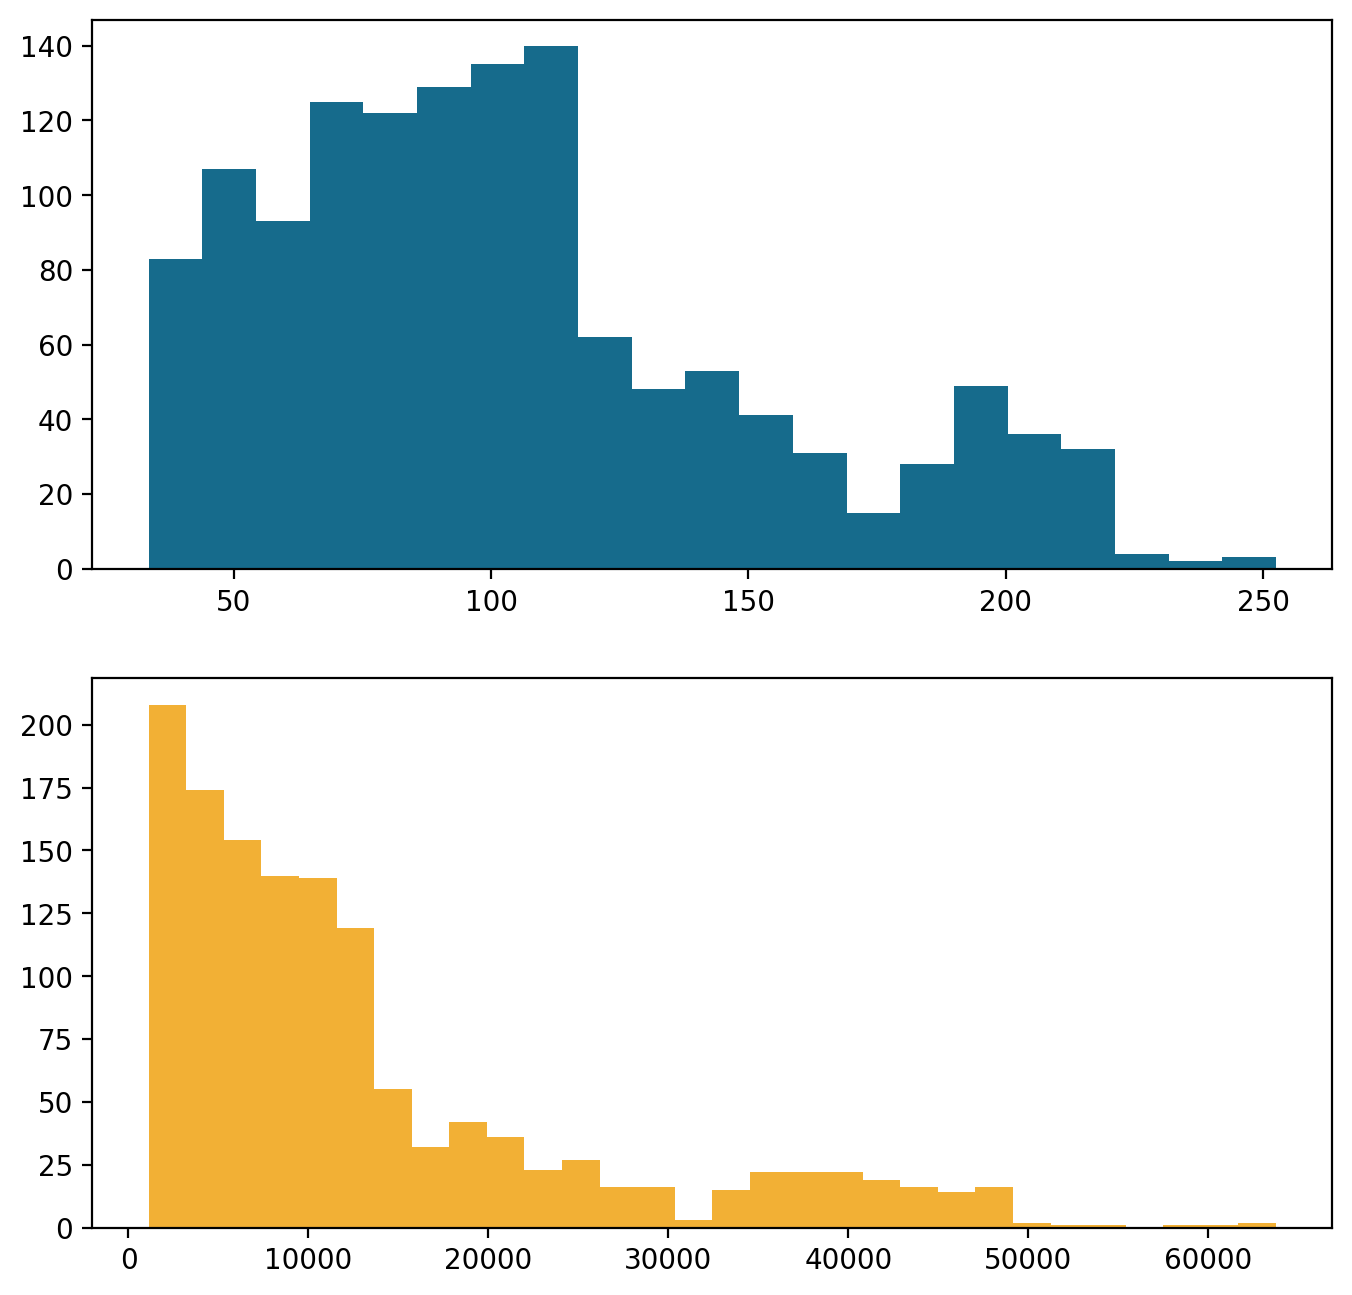

In [91]:
# data clean 2 - transform outliers
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[8,8],dpi=200)
axs = axes.ravel()
axs[0].hist(np.sqrt(target),bins='auto',color='#166B8C')
axs[1].hist(target,bins='auto',color='#F2B035')
plt.show()

In [92]:
# target = np.log(target)

In [93]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [94]:
vfi = pd.DataFrame()
vfi['features'] = numeric_data.columns
vfi['VFI'] = [variance_inflation_factor(numeric_data.values,i) for i in range(numeric_data.shape[1])]
vfi.sort_values(by='VFI')

,features,VFI
2,children,1.796637
0,age,7.536550
1,bmi,7.846515


In [95]:
full = pd.get_dummies(data)
full.ndim

2

In [96]:
np.ones(full.shape[0]).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [97]:
full = np.hstack([full,np.ones(full.shape[0]).reshape(-1,1)])
full.shape

(1338, 12)

In [98]:
train_x,test_x,train_y,test_y = train_test_split(full,target,test_size=0.2,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1070, 12), (1070,), (268, 12), (268,))

In [115]:
weights = regression_model.regression(train_x,train_y)
weights

array([   256.97570583,    337.09255195,    425.27878352,   -118.37875696,
         -136.9704486 , -11953.23903066,  11697.8898251 ,    395.74794285,
           25.07061663,   -262.11635371,   -414.05141133,   -255.34920556])

In [116]:
predict_1 = np.dot(test_x,weights)
predict_1

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [117]:
r2_score(test_y,predict_1)*100, mean_squared_error(test_y,predict_1)

(78.35929767120724, 33596915.851361446)

In [122]:
weights_gd,cost_history = regression_model.fit(np.log10(train_x + 1),np.log10(train_y + 1),0.001,10001)
weights_gd

array([ 1.27793328,  1.18047914,  0.20167734,  0.12154669,  0.12766188,
       -0.10513166,  0.35434023,  0.10064252,  0.06315218,  0.04734861,
        0.03806525,  0.24920857])

In [103]:
weights_ridge = regression_model.ridge_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.05,
                                           100001)
weights_ridge

array([ 16.66971766,  11.69888978,   4.24049059,  -7.68195854,
        -9.37889163, -53.70190929,  36.64105912,  -1.27923235,
        -3.69807883,  -5.89271818,  -6.19082081, -17.06085017])

In [104]:
# optimize alpha
alpha = np.arange(0,1,0.01)
alpha_hist = []

for i in range(alpha.shape[0]):
    w = regression_model.ridge_fit(np.sqrt(train_x),
                                   np.sqrt(train_y),
                                   0.01,
                                   alpha[i],
                                   10001)
    alpha_hist.append(w)

alpha_hist

KeyboardInterrupt: 

In [ ]:
alpha_hist = np.asarray(alpha_hist)

fig = plt.figure(figsize=[8,8],dpi=200)
ax = fig.add_subplot(111)
ax.plot(alpha_hist)
plt.show()

In [123]:
predict_2 = np.dot(np.log10(test_x + 1),weights_gd)
predict_2

array([4.00516087, 3.86388057, 4.26029841, 4.04389371, 3.69308626,
       4.06608229, 3.38044505, 4.29456278, 3.46912111, 4.13179002,
       3.91723464, 4.04162812, 3.79628295, 4.42505255, 4.43113659,
       4.36953719, 4.29792831, 4.30163919, 4.01896795, 4.04373897,
       3.70662153, 4.09151941, 3.52298407, 3.75186796, 4.13100136,
       4.13735538, 4.21155663, 3.83685887, 4.05595888, 3.49304813,
       4.04222815, 4.14236276, 3.64506861, 3.68588416, 3.74368001,
       4.13840507, 3.56489156, 4.01121816, 4.15440467, 4.13916076,
       3.64781364, 3.68409558, 4.24447199, 4.05250853, 3.99716095,
       4.14374392, 3.7280141 , 3.67743735, 4.30682801, 3.99908055,
       4.25776102, 3.54092275, 4.14202569, 3.43832282, 4.16894613,
       4.18476336, 3.69729632, 4.11245136, 4.16383475, 4.13577553,
       4.18905441, 4.03775722, 4.35785233, 3.95271029, 4.0885582 ,
       3.71698873, 3.77203496, 4.11822081, 3.58676798, 3.73102476,
       4.071659  , 4.1405248 , 4.06700274, 4.03743433, 4.14846

In [124]:
r2_score(np.log10(test_y + 1),predict_2)*100, mean_squared_error(np.log10(test_y + 1),predict_2)

(50.50432424234792, 0.08391211279542432)

In [107]:
predict_3 = np.dot(np.sqrt(test_x),weights_ridge)
predict_3

array([ 96.79569695,  81.97432302, 202.21753065,  95.92415912,
       145.26099214,  91.73383588,  46.03001905, 121.54460891,
        57.12934547, 102.85585711, 160.44729816,  93.59998799,
        73.31032062, 200.84559202, 208.26800351, 197.59070697,
       114.77631398, 195.33271593,  94.92253365, 178.17043815,
        63.69123673,  95.77159656,  50.83236963,  72.27366004,
       105.11186936, 109.65132592, 113.7979074 ,  76.32356896,
       100.8920793 ,  48.91605146,  92.59946939, 109.70851989,
        61.13571678,  68.75933813,  66.98469263, 104.21268607,
        56.10517883,  92.88617395, 190.11533878, 177.97642663,
        60.07255614,  64.09200359, 114.34778183, 103.23294585,
        85.67201462, 107.30004518,  68.0878802 ,  63.72750712,
       191.12807841,  85.2615783 , 118.45955   ,  52.33081885,
       102.8183949 ,  49.0988306 , 107.35604712, 108.74134163,
        68.91306531, 175.26682845, 109.6240026 , 109.09251537,
       113.64802435,  89.78504682, 121.49769202,  90.36

In [108]:
r2_score(np.sqrt(test_y),predict_3)*100, mean_squared_error(np.sqrt(test_y),predict_3)

(80.93875722463133, 462.5168338518414)

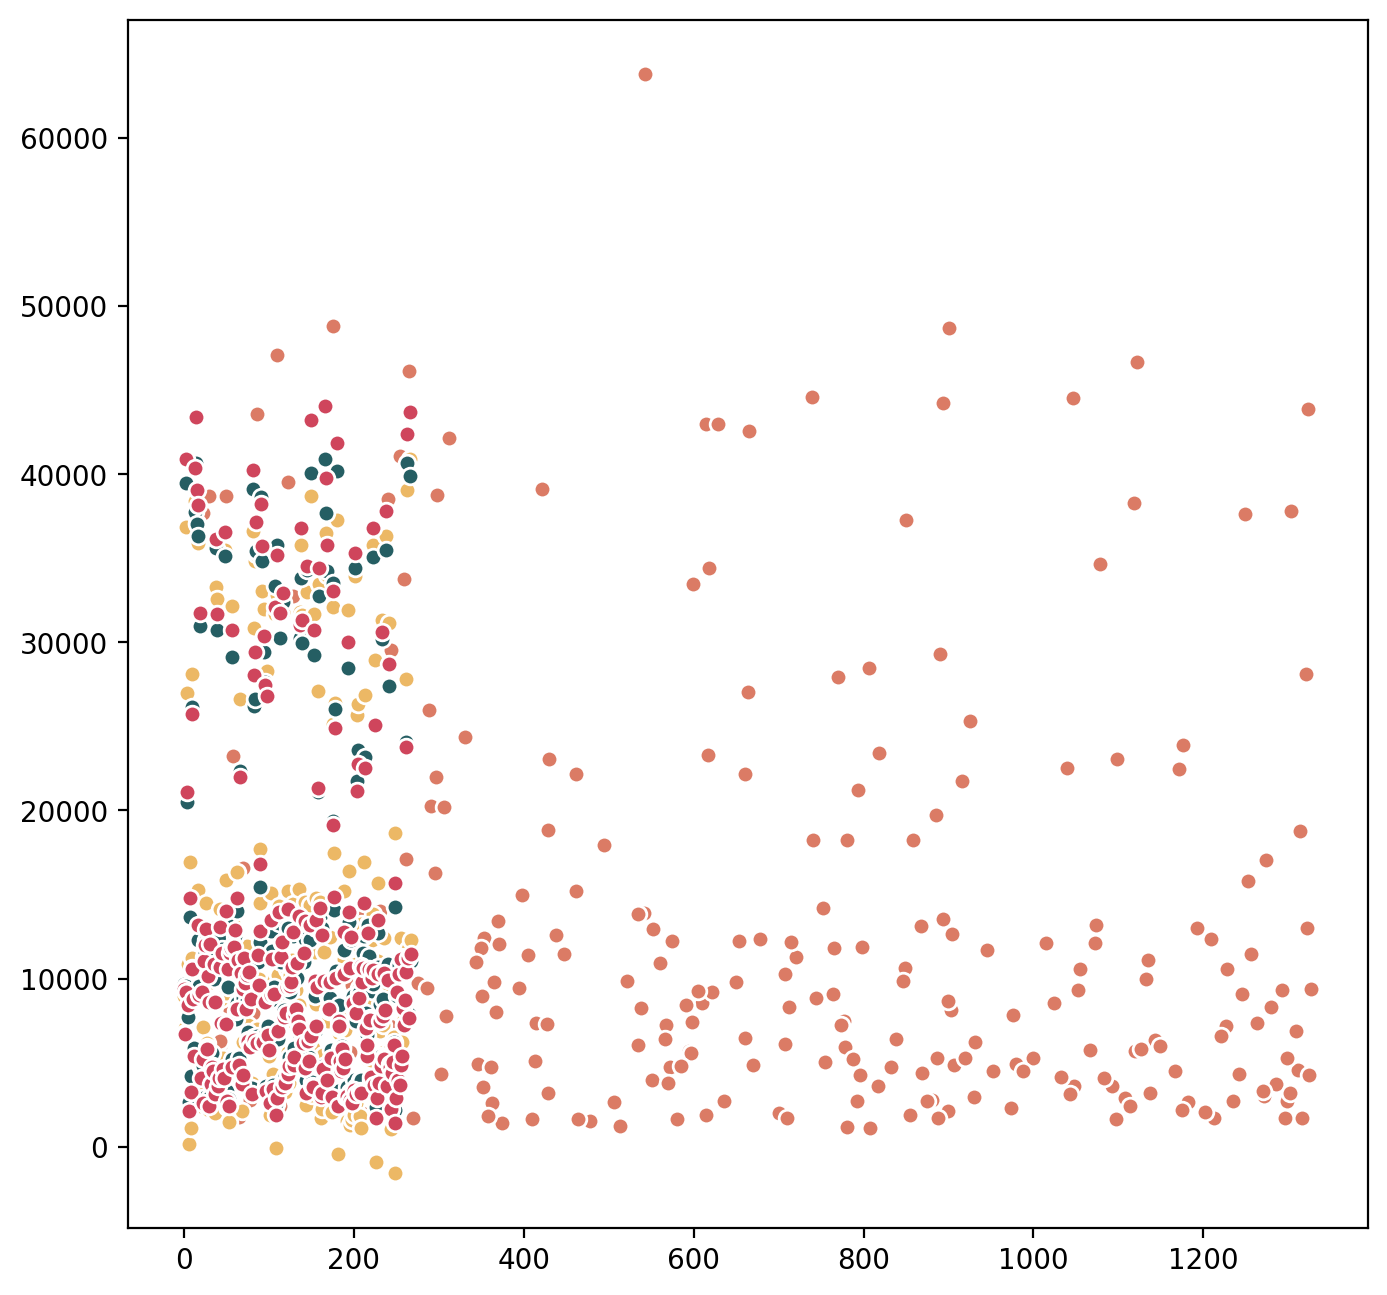

In [109]:
plt.figure(figsize=[8,8],dpi=200)
plt.plot(test_y,'o',color='#DB7B65',markeredgecolor='w')
plt.plot(predict_1,'o',color='#ECB865',markeredgecolor='w')
plt.plot(np.square(predict_2),'o',color='#255E63',markeredgecolor='w')
plt.plot(np.square(predict_3),'o',color='#CF455C',markeredgecolor='w')
plt.show()

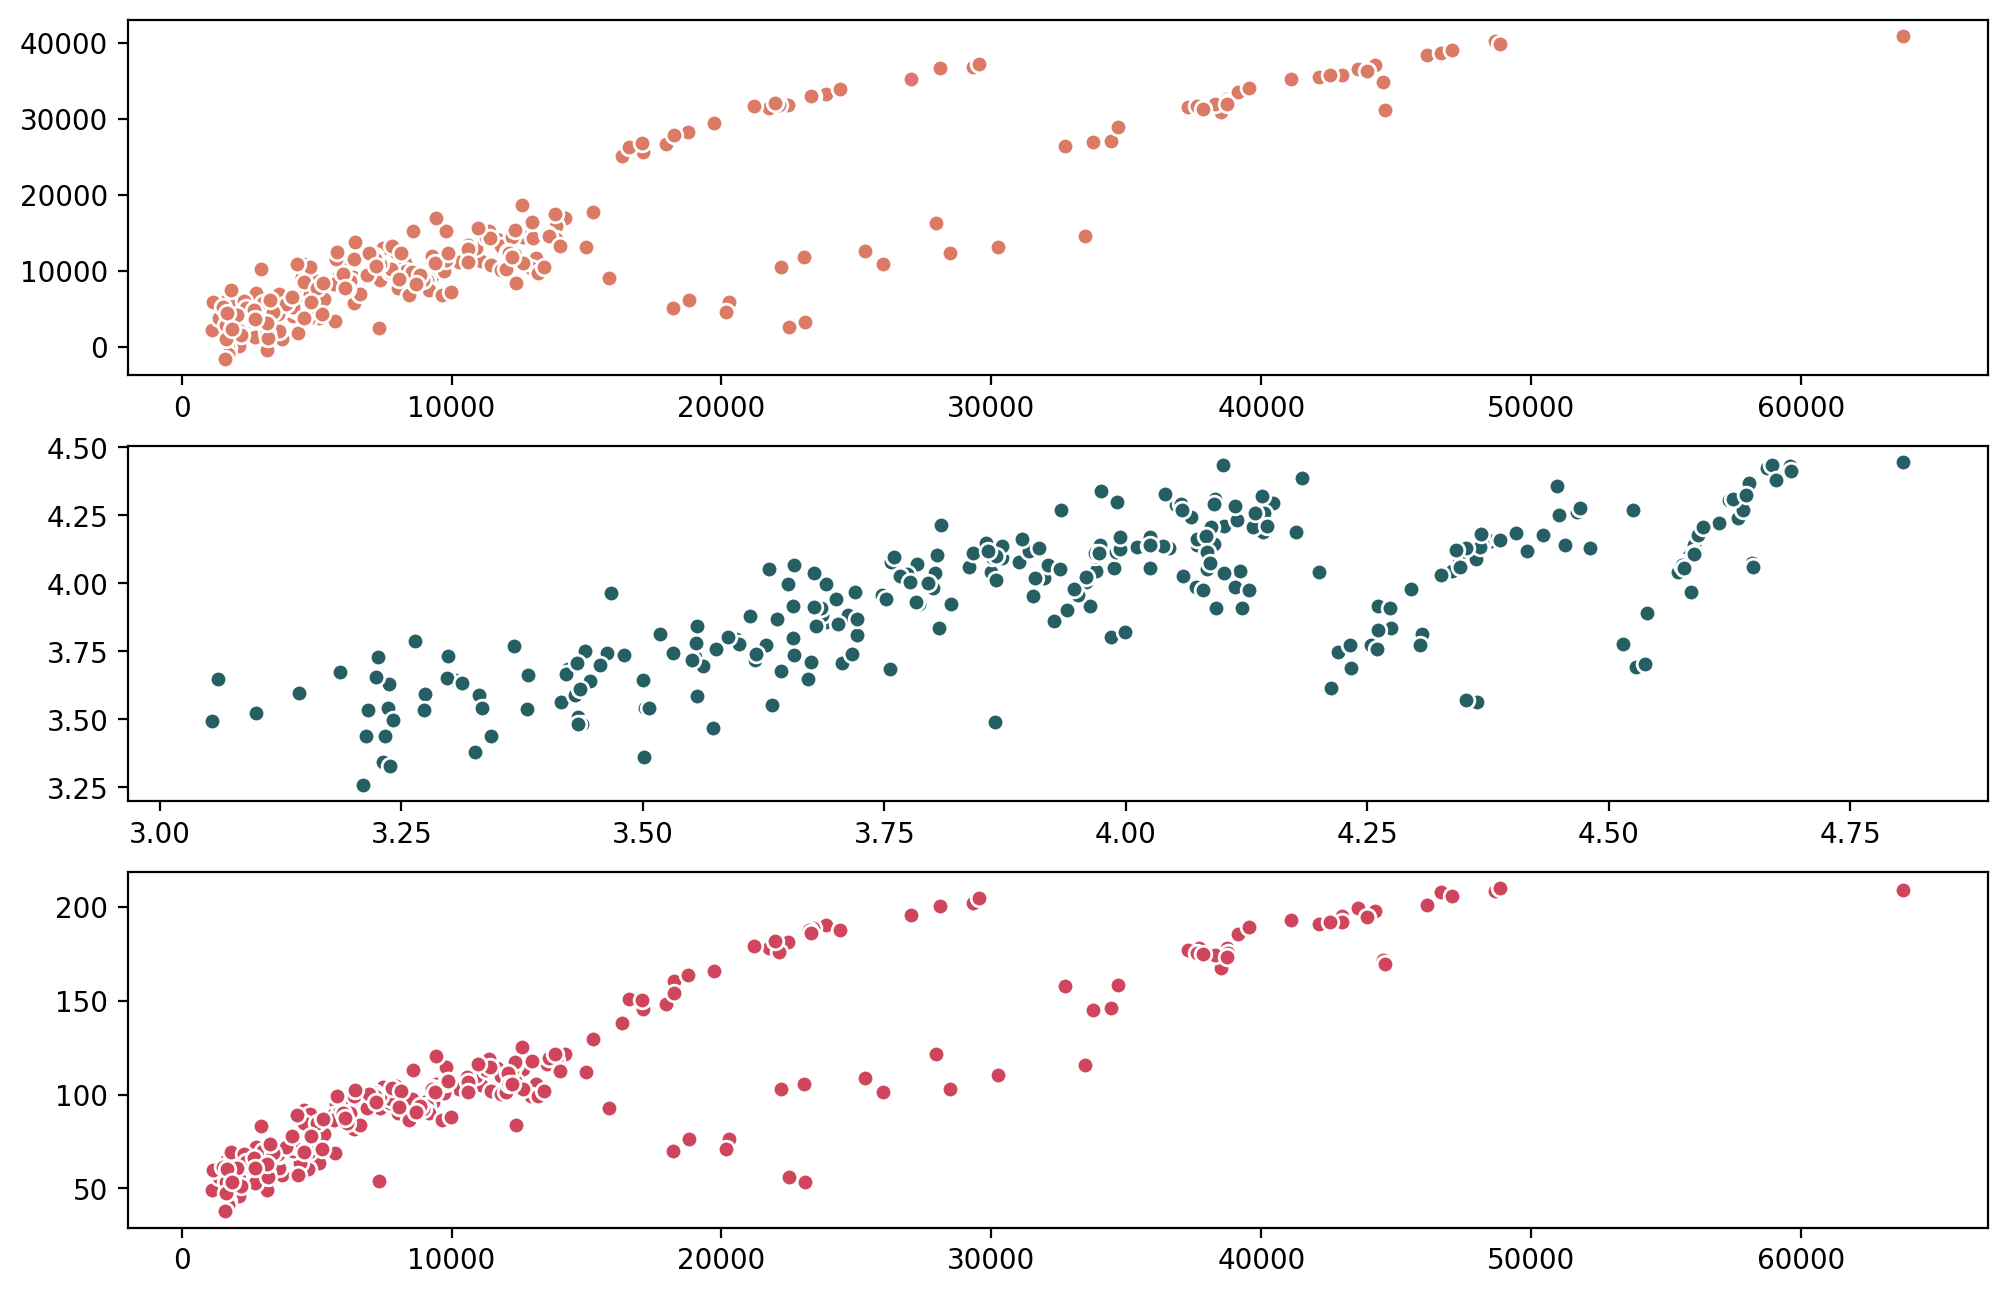

In [125]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=[12,8],dpi=200)
axs = axes.ravel()
axs[0].scatter(test_y,predict_1,color='#DB7B65',edgecolor='w')
axs[1].scatter(np.log10(test_y+1),predict_2,color='#255E63',edgecolors='w')
axs[2].scatter(test_y,predict_3,color='#CF455C',edgecolors='w')
plt.show()

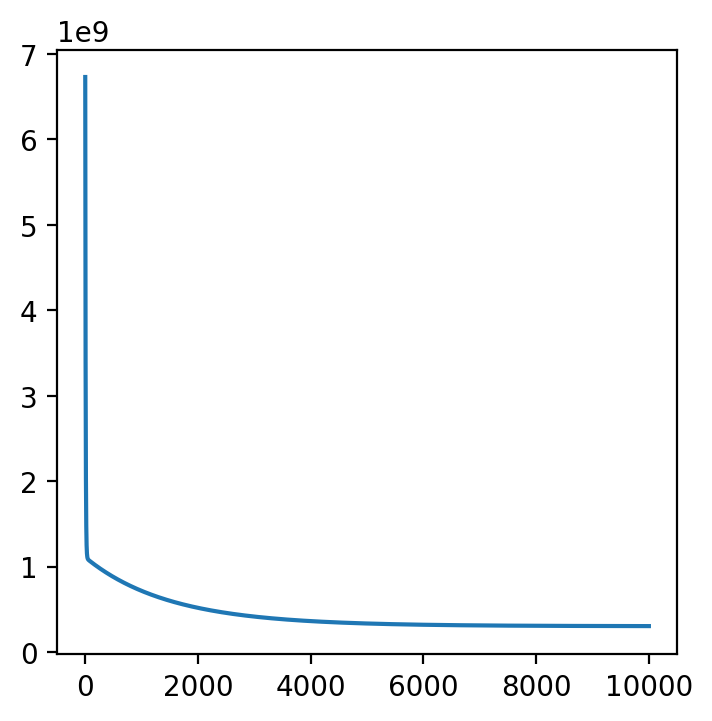

In [111]:
plt.figure(figsize=[4,4],dpi=200)
plt.plot(cost_history)
plt.show()